In [250]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [251]:
train = pd.read_csv('train - train.csv')
test = pd.read_csv('test - test.csv')

In [252]:
train[train['label'] == 0].head(10)

,text,aspect,label
1,cannot rely on both milk delivery and grocery ...,Milk,0
2,"I get no notification, however the app is real...",notification,0
4,it does not let me load a clip on the scene,load,0
7,"some times missing to deliver, some times diff...","deliver,",0
10,so i wanted to download the app.,app,0
13,"app must support androids ""multi-window"" api t...",Androids,0
15,ensure customers are getting delivery everyday...,delivery,0
19,Just used the app for 5 mins on iOS 13 and: cr...,UI,0
21,there is no difference between you and the reg...,delivery charges.,0
22,items missing is not logical for all the locat...,Items missing,0


In [253]:
train[train['label'] == 1].head(10)

,text,aspect,label
0,can you check whether its cancelled completely?,cancelled,1
3,"Love this app, but would love it even more if ...",view,1
6,unlimited yearly at $216/year,yearly,1
8,Would love the ability to “un-delete” deleted ...,tasks,1
11,-&gt; i want to learn for the future whether w...,learn,1
17,you can go to the exported tab to see only the...,exported,1
18,"so, you can use 10 istock media only in a month",iStock,1
20,i thought linked databases were my favourite f...,databases,1
24,i can look into this for you - could you share...,share,1
29,"hello, i recently purchased the business plan ...",Business plan,1


In [254]:
train[train['label'] == 2].head(10)

,text,aspect,label
5,"i love notion as a tool, but the mobile just t...","tool,",2
9,please add this basic feature,Please,2
12,the desktop version is simply awesome comparat...,desktop version,2
14,prompt and reliable service,Prompt,2
16,"the ease of ordering, timely delivery and best...","ease of ordering,",2
23,it is a wonderful app,app,2
28,doens't start only,Doens't,2
39,notion has become what evernote could not.,note,2
43,punctuality as well keeing update.,Punctuality,2
50,i am talking about the offline mode in which y...,offline mode,2


In [255]:
train.isnull().any()
test.isnull().any()

text      False
aspect    False
dtype: bool

In [256]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
text      4000 non-null object
aspect    4000 non-null object
label     4000 non-null int64
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


In [257]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
text      1000 non-null object
aspect    1000 non-null object
dtypes: object(2)
memory usage: 15.8+ KB


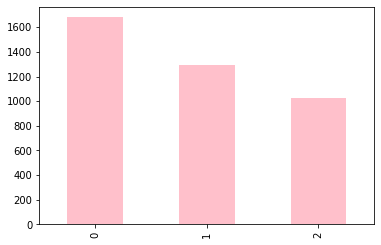

In [258]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

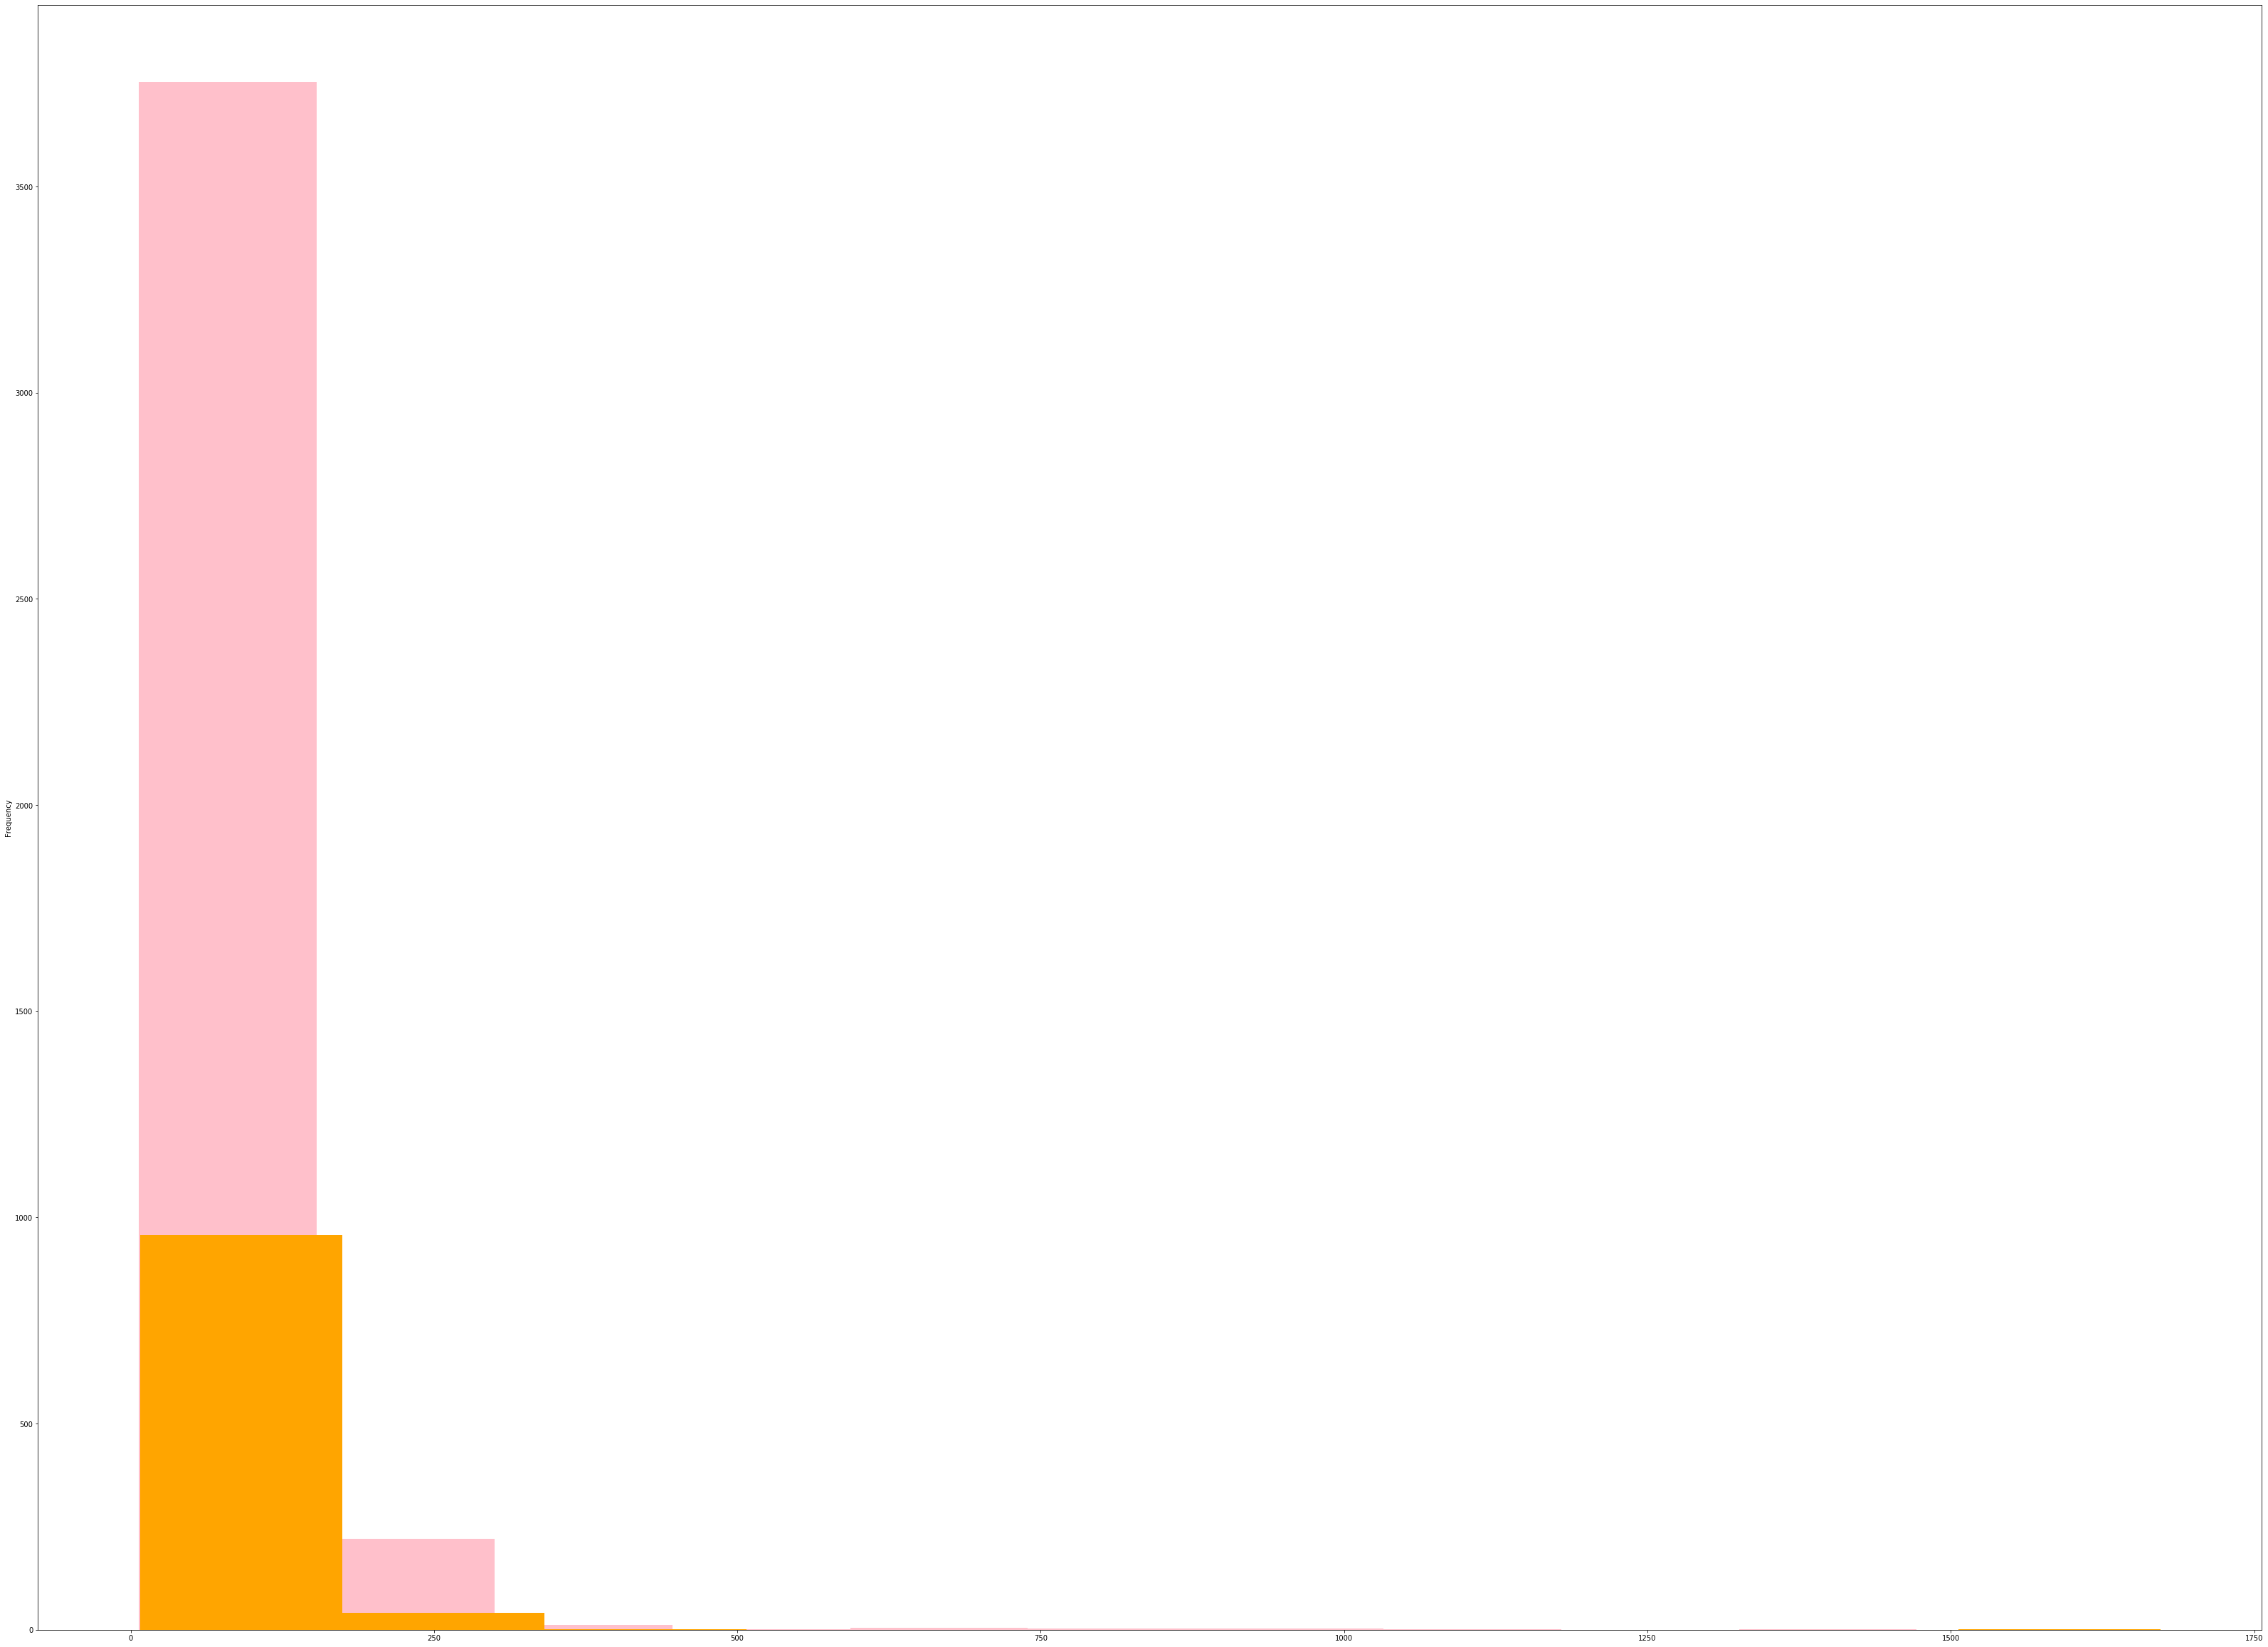

In [259]:
# checking the distribution of text in the data

length_train = train['text'].str.len().plot.hist(color = 'pink', figsize = (56, 42))
length_test = test['text'].str.len().plot.hist(color = 'orange', figsize = (56, 42))

In [260]:
train.shape

(4000, 3)

In [261]:
test.shape

(1000, 2)

# Define what's a positive and a negative text
We will ignore all text with label = 1, since they tend to have a neutral text. Text with a label of 2 will be considered positive, while with label of 0  will have a negative text.

In [262]:
#ignore all 1* label
train = train[train['label'] != 1]
train.shape

(2706, 3)

In [263]:
#Check label-distribution
train['label'].value_counts()

0    1680
2    1026
Name: label, dtype: int64

In [264]:
# adding a column to represent the length of the text

train['len'] = train['text'].str.len()
test['len'] = test['text'].str.len()

train.head(10)

,text,aspect,label,len
1,cannot rely on both milk delivery and grocery ...,Milk,0,52
2,"I get no notification, however the app is real...",notification,0,53
4,it does not let me load a clip on the scene,load,0,43
5,"i love notion as a tool, but the mobile just t...","tool,",2,72
7,"some times missing to deliver, some times diff...","deliver,",0,73
9,please add this basic feature,Please,2,29
10,so i wanted to download the app.,app,0,32
12,the desktop version is simply awesome comparat...,desktop version,2,52
13,"app must support androids ""multi-window"" api t...",Androids,0,105
14,prompt and reliable service,Prompt,2,27


In [265]:
train.groupby('label').describe()

len                                                     
        count       mean        std  min   25%   50%   75%     max
label                                                             
0      1680.0  74.105952  48.268439  7.0  42.0  63.0  93.0   699.0
2      1026.0  66.362573  59.454275  7.0  34.0  53.0  86.0  1083.0

In [266]:
#Data Cleaning
def clean_text(text):
    
    # remove URL
    text = re.sub(r"http\S+", "", text)
    
    # Remove usernames
    text = re.sub(r"@[^\s]+[\s]?",'',text)
    
    # remove special characters 
    text = re.sub('[^ a-zA-Z0-9]', '', text)
    
    # remove Numbers
    text = re.sub('[0-9]', '', text)
    
    return text

In [267]:
# Apply function to Text column

train['text'] = train['text'].apply(clean_text)

In [268]:
'''
text = 'text4 http://url.com/bla2/blah2'
re.sub(r"http\S+", "", text)
text = '@ajay dkfhskf dfs'
re.sub(r"@[^\s]+[\s]?",'',text)
re.sub('[^ a-zA-Z0-9]', '', text)
'''

'\ntext = \'text4 http://url.com/bla2/blah2\'\nre.sub(r"http\\S+", "", text)\ntext = \'@ajay dkfhskf dfs\'\nre.sub(r"@[^\\s]+[\\s]?",\'\',text)\nre.sub(\'[^ a-zA-Z0-9]\', \'\', text)\n'

In [269]:
train['text'].head()

1    cannot rely on both milk delivery and grocery ...
2    I get no notification however the app is reall...
4          it does not let me load a clip on the scene
5    i love notion as a tool but the mobile just ta...
7    some times missing to deliver some times diffe...
Name: text, dtype: object

In [270]:
words = Counter()
for idx in train.index:
    words.update(train.loc[idx, "text"])

words.most_common(5)

[(' ', 32565), ('e', 18493), ('t', 13665), ('o', 12766), ('i', 11893)]

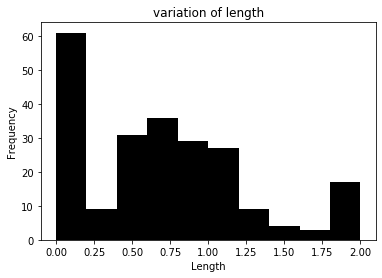

In [271]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

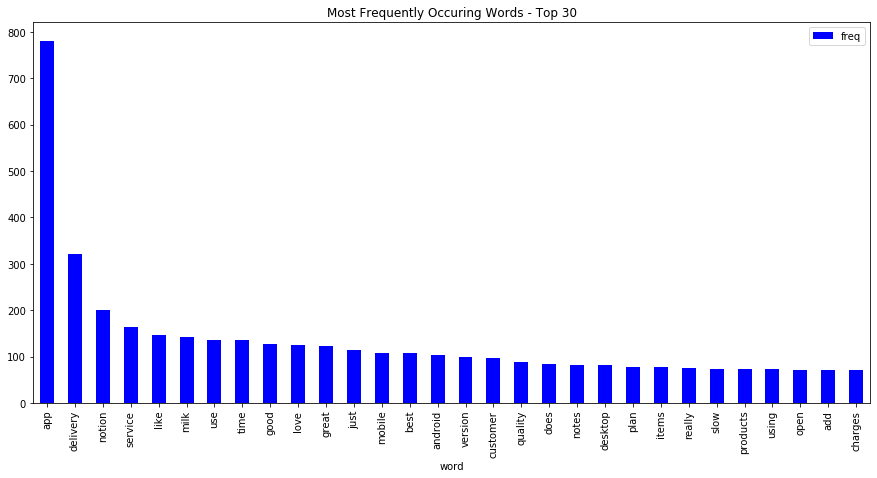

In [272]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

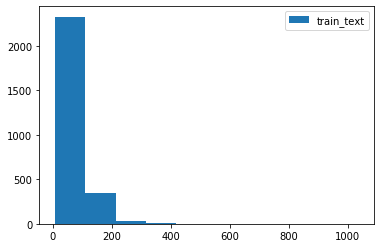

In [273]:
#The distribution of length of text in terms of words
len_train = train['text'].str.len()

plt.hist(len_train, bins = 10, label='train_text')
plt.legend()
plt.show()

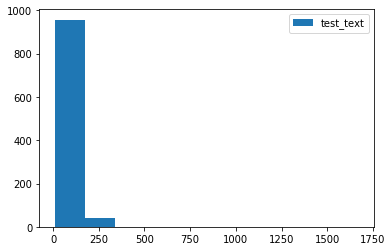

In [274]:
len_test = test['text'].str.len()

plt.hist(len_test, bins = 10, label='test_text')
plt.legend()
plt.show()

In [275]:
Combine = train.append(test, ignore_index=True)
Combine.shape

(3706, 4)

In [276]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [277]:
Combine['text'] = np.vectorize(remove_pattern)(Combine['text'], '@[\w]*')
Combine.head(10)

,aspect,label,len,text
0,Milk,0.0,52,cannot rely on both milk delivery and grocery ...
1,notification,0.0,53,I get no notification however the app is reall...
2,load,0.0,43,it does not let me load a clip on the scene
3,"tool,",2.0,72,i love notion as a tool but the mobile just ta...
4,"deliver,",0.0,73,some times missing to deliver some times diffe...
5,Please,2.0,29,please add this basic feature
6,app,0.0,32,so i wanted to download the app
7,desktop version,2.0,52,the desktop version is simply awesome comparat...
8,Androids,0.0,105,app must support androids multiwindow api to w...
9,Prompt,2.0,27,prompt and reliable service


In [278]:
Combine['text'] = Combine['text'].str.replace("[^a-zA-Z#]", " ")
Combine.head(10)

,aspect,label,len,text
0,Milk,0.0,52,cannot rely on both milk delivery and grocery ...
1,notification,0.0,53,I get no notification however the app is reall...
2,load,0.0,43,it does not let me load a clip on the scene
3,"tool,",2.0,72,i love notion as a tool but the mobile just ta...
4,"deliver,",0.0,73,some times missing to deliver some times diffe...
5,Please,2.0,29,please add this basic feature
6,app,0.0,32,so i wanted to download the app
7,desktop version,2.0,52,the desktop version is simply awesome comparat...
8,Androids,0.0,105,app must support androids multiwindow api to w...
9,Prompt,2.0,27,prompt and reliable service


In [279]:
Combine['text'] = Combine['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
Combine.head(10)

,aspect,label,len,text
0,Milk,0.0,52,cannot rely both milk delivery grocery items
1,notification,0.0,53,notification however really fine
2,load,0.0,43,does load clip scene
3,"tool,",2.0,72,love notion tool mobile just takes long load
4,"deliver,",0.0,73,some times missing deliver some times differen...
5,Please,2.0,29,please this basic feature
6,app,0.0,32,wanted download
7,desktop version,2.0,52,desktop version simply awesome comparatively
8,Androids,0.0,105,must support androids multiwindow would better...
9,Prompt,2.0,27,prompt reliable service


In [280]:
#Text Normalization
Tokenize_text = Combine['text'].apply(lambda x: x.split())
Tokenize_text.head(10)

0    [cannot, rely, both, milk, delivery, grocery, ...
1                [notification, however, really, fine]
2                            [does, load, clip, scene]
3    [love, notion, tool, mobile, just, takes, long...
4    [some, times, missing, deliver, some, times, d...
5                       [please, this, basic, feature]
6                                   [wanted, download]
7    [desktop, version, simply, awesome, comparativ...
8    [must, support, androids, multiwindow, would, ...
9                          [prompt, reliable, service]
Name: text, dtype: object

In [281]:
#For normalization, we will use nltk's PorterStemmer() function
from nltk.stem.porter import *

stemmer = PorterStemmer()
Tokenize_text = Tokenize_text.apply(lambda x: [stemmer.stem(i) for i in x])

In [282]:
#combine the tokens
#nltk’s MosesDetokenizer function

for i in range(len(Tokenize_text)):
    Tokenize_text[i] = ' '.join(Tokenize_text[i])
    
Combine['text'] = Tokenize_text

In [283]:
Combine.head(10)

,aspect,label,len,text
0,Milk,0.0,52,cannot reli both milk deliveri groceri item
1,notification,0.0,53,notif howev realli fine
2,load,0.0,43,doe load clip scene
3,"tool,",2.0,72,love notion tool mobil just take long load
4,"deliver,",0.0,73,some time miss deliv some time differ order deliv
5,Please,2.0,29,pleas thi basic featur
6,app,0.0,32,want download
7,desktop version,2.0,52,desktop version simpli awesom compar
8,Androids,0.0,105,must support android multiwindow would better ...
9,Prompt,2.0,27,prompt reliabl servic


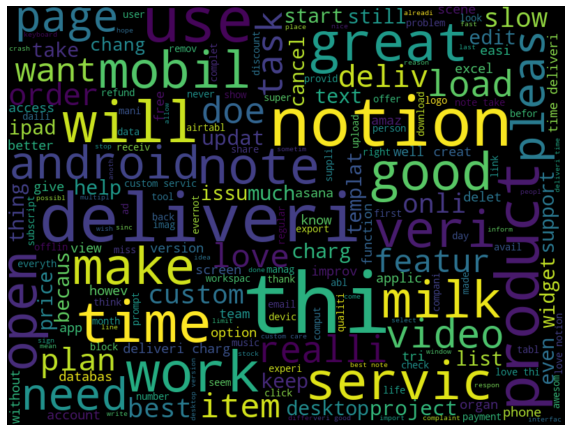

In [284]:
#Data Exploration
all_words = ' '.join([text for text in Combine['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

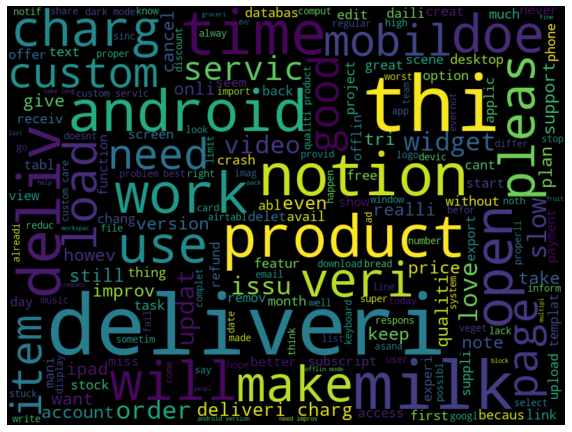

In [285]:
#Negative text
neg_words = ' '.join([text for text in Combine['text'][Combine['label'] == 0]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(neg_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

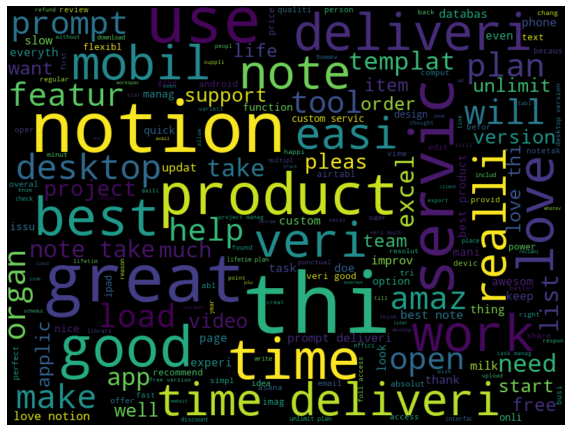

In [286]:
#Positive text
pos_words = ' '.join([text for text in Combine['text'][Combine['label'] == 2]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(pos_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [288]:
BOWvectorize = CountVectorizer(max_df=0.90, min_df=2, max_features = 1000, stop_words='english')
BOW = BOWvectorize.fit_transform(Combine['text'])
BOW.shape

(3706, 1000)

In [289]:
TfidfVect = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
Tfidf = TfidfVect.fit_transform(Combine['text'])
Tfidf.shape

(3706, 1000)

In [290]:
#Function to create a vector for each text by taking the average of the vectors of the words present in the text
def word_vec(tokens, size):
  vec = np.zeros(size).reshape((1, size))
  count = 0
  for word in tokens:
    try:
      vec += Model_W2V[word].reshape((1, size))
      count += 1
    except KeyError:
      
      continue
    
  if count != 0:
    vec = vec/count
   
  return vec

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [292]:
#Extract train and test bow features
Train_Bow = BOW[:2706,:]
Test_Bow = BOW[2706:,:]

#Split data into train and validation set
XTrain_Bow, XValid_Bow, YTrain, YValid = train_test_split(Train_Bow, train['label'],
                                                          random_state = 42,
                                                          test_size=0.2)

In [293]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\uday
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [294]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(4000, 2500)
(2706,)


In [295]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(1000, 1700)


In [296]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

XTrain_Bow, XValid_Bow, YTrain, YValid = train_test_split(Train_Bow, train['label'],
                                                          random_state = 42,
                                                          test_size=0.2)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(3000, 2500)
(1000, 2500)
(3000,)
(1000,)


In [297]:
rf = RandomForestClassifier(n_estimators=400, random_state=11)

rf.fit(XTrain_Bow, YTrain)

Prediction = rf.predict(XValid_Bow)
f1_score(YValid, Prediction, average='micro')

0.7435424354243543

In [298]:
from xgboost import XGBClassifier

In [299]:
xgbModel = XGBClassifier(Max_depth=6, n_estimators=1000)

xgbModel.fit(XTrain_Bow, YTrain)

Prediction = xgbModel.predict(XValid_Bow)
f1_score(YValid, Prediction, average='micro')

0.7841328413284133

In [300]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'max_depth':[61,60,62],
              'random_state': range(0,2),
              'n_estimators':[164,165,166,167], 
             }
grid = GridSearchCV(model,parameters,cv=5)
grid.fit(XTrain_Bow, YTrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [301]:
grid.best_score_

0.756007393715342

In [302]:
grid.best_params_

{'max_depth': 62, 'n_estimators': 166, 'random_state': 1}

In [303]:
y_predict = grid.predict(XValid_Bow)
model = RandomForestClassifier(random_state=1,
                               n_estimators=164,
                              max_depth=61)
model.fit(XTrain_Bow,YTrain)
y_predict = model.predict(XValid_Bow)
from sklearn.metrics import accuracy_score
accuracy_score(YValid,y_predict)

0.7804428044280443

In [304]:
pd.crosstab(YValid,y_predict)

col_0,0,2
label,,
0,298,41
2,78,125


In [305]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=9)
XTrain_Bow_smote, YTrain_smote = smote.fit_sample(XTrain_Bow.astype('float'),YTrain)

In [306]:
print(Counter(YTrain))
print(Counter(YTrain_smote))

Counter({0: 1341, 2: 823})
Counter({2: 1341, 0: 1341})


In [307]:
YTrain.shape, YTrain_smote.shape

((2164,), (2682,))

In [308]:
pd.DataFrame(XTrain_Bow_smote).tail(10)

,0
2672,"(0, 229)\t1.0\n (0, 268)\t0.959046424698031..."
2673,"(0, 176)\t0.6680380094690248\n (0, 331)\t1...."
2674,"(0, 518)\t0.2178138157311934"
2675,"(0, 382)\t0.3696869585907532\n (0, 906)\t0...."
2676,"(0, 43)\t0.5294969044266918\n (0, 87)\t1.0\..."
2677,"(0, 3)\t0.5471711871595589\n (0, 87)\t1.0\n..."
2678,"(0, 264)\t0.4403576718847628\n (0, 382)\t1...."
2679,"(0, 271)\t0.9849971828254547\n (0, 564)\t0...."
2680,"(0, 233)\t0.10863629965797328\n (0, 379)\t1..."
2681,"(0, 302)\t0.5845360507663943\n (0, 385)\t0...."


In [309]:
model.fit(XTrain_Bow_smote,YTrain_smote)
y_predict = model.predict(XValid_Bow)
print(accuracy_score(YValid,y_predict))
pd.crosstab(YValid,y_predict)

0.7730627306273062


col_0,0,2
label,,
0,270,69
2,54,149


In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [311]:
model = RandomForestClassifier()
model.fit(XTrain_Bow, YTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [312]:
y_pred = model.predict(XValid_Bow)

In [313]:
print("Training Accuracy :", model.score(XTrain_Bow, YTrain))
print("Validation Accuracy :", model.score(XValid_Bow, YValid))

Training Accuracy : 0.9745841035120147
Validation Accuracy : 0.7195571955719557
